In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
odors = pd.read_csv('data/Odors.tsv',delimiter='\t',index_col='Odor').dropna()
odors['CID'] = odors['CID'].astype('int')
odors.head()

,CASRegistryNum,OdorName,CID,SMILES
Odor,,,,
1024,2244-16-8,(+)-carvone,16724,CC1=CC[C@@H](CC1=O)C(=C)C
1025,6485-40-1,(-)-carvone,439570,CC1=CC[C@H](CC1=O)C(=C)C
1064,111-71-7,heptaldehyde,8130,CCCCCCC=O
1067,111-14-8,heptanoic acid,8094,CCCCCCC(=O)O
1069,79-09-4,propionic acid,1032,CCC(=O)O


In [102]:
receptors = pd.read_csv('data/Receptors.tsv',delimiter='\t')
receptors['OR'] = receptors['OR'].astype('int')
receptors = receptors.set_index('OR')
receptors.head()

,Gene,NucleotideSeq
OR,,
999,Vector control,NaN
1024,OR10K1,ATGGAGCAAGTCAATAAGACTGTGGTGAGAGAGTTCGTCGTCCTCG...
1025,OR6Y1 V252I,ATGACCACCATAATTCTGGAAGTAGATAATCATACAGTGACAACAC...
1026,OR10Z1,ATGGGGCAGACCAACGTAACCTCCTGGAGGGATTTTGTCTTCCTGG...
1027,OR6N2,ATGGATCAATACAACCATTCAAGCCTGGCTGAATTTGTGTTCCTTG...


In [101]:
(receptors['OR'].value_counts()!=1).sum()

0

In [122]:
dose_response = pd.read_csv('~/Desktop/DR.tsv',delimiter='\t').set_index(['Odor','OR'])
dose_response.head()

concentration  NormalizedLuc    Date
Odor OR                                        
1341 1030       0.000001       0.277011  120710
     1030       0.001000       0.535902  120710
1316 1030       0.000100       0.503810  111810
1341 1030       0.001000       0.838039  120710
1316 1030       0.000010       0.313976  111810

In [83]:
odors[odors['OdorName']=='1-octanethiol']

,CASRegistryNum,OdorName,CID,SMILES
Odor,,,,
1274,111-88-6,1-octanethiol,8144,CCCCCCCCS


In [103]:
receptors[receptors['Gene']=='OR2C1']

,Gene,NucleotideSeq
OR,,
1406,OR2C1,ATGGACGGGGTGAATGATAGCTCCTTGCAGGGCTTTGTTCTGATGA...
1407,OR2C1,ATGGACGGGGTGAATGATAGCTCCTTGCAGGGCTTTGTTCTGATGG...


In [140]:
processed = pd.read_excel('/Users/rgerkin/Desktop/sdata20152-s2.xls').set_index(['OR','Odor'])
processed = processed[processed['EC50'].notnull()][['EC50','DRDate']]

EC50    DRDate
OR  Odor                
999 1024  -7.0   22211.0
    1024  -9.0   52411.0
    1025  -2.0  111610.0
    1025  -7.0  120710.0
    1067  -7.0  121410.0

In [153]:
replicates = processed.groupby(['OR','Odor']).count()['EC50']
std = processed[replicates>=2].groupby(['OR','Odor']).std()['EC50']
std.mean()

/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.7975000400295749

In [171]:
EC50 = processed.groupby(['OR','Odor']).mean()[['EC50']]

In [223]:
EC50.xs(1024,level=1) #(+)-carvone

,EC50
OR,
999,-8.000000
1528,-7.000000
1529,-6.333333
1530,-6.333333
1531,-7.666667
1727,-8.000000


In [224]:
EC50.xs(1025,level=1) #(-)-carvone

,EC50
OR,
999,-4.5
1529,-3.0
1530,-3.0
1531,-3.0
1727,-8.0


In [230]:
receptors.loc[1531]

Gene                                                   OR1A1 P285S
NucleotideSeq    ATGAGGGAAAATAACCAGTCCTCTACACTGGAATTCATCCTCCTGG...
Name: 1531, dtype: object

In [179]:
df = EC50.join(odors).join(receptors).reset_index().set_index(['OdorName','OR'])['EC50']

In [201]:
odor_list = list(df.index.get_level_values('OdorName').astype('str'))
[x for x in odor_list if any([s in x for s in ['(+)','(-)']])]

['(+)-carvone',
 '(-)-carvone',
 '(+)-menthol',
 '(+)-menthol',
 '(-)-menthol',
 '(+)-menthol',
 '(+)-dihydrocarvone',
 '(-)-menthol',
 '(-)-menthol',
 '(+)-carvone',
 '(+)-carvone',
 '(-)-carvone',
 '(+)-carvone',
 '(-)-carvone',
 '(+)-carvone',
 '(-)-carvone',
 '(+)-dihydrocarvone',
 '(+)-carvone',
 '(-)-carvone']

In [206]:
set(df.loc['(+)-carvone'].index).intersection(df.loc['(-)-carvone'].index)

{999, 1529, 1530, 1531, 1727}

In [207]:
set(df.loc['(+)-menthol'].index).intersection(df.loc['(-)-menthol'].index)

{1195}

In [218]:
odors[odors['OdorName'].str.contains('\(\+\)')]

,CASRegistryNum,OdorName,CID,SMILES
Odor,,,,
1024,2244-16-8,(+)-carvone,16724,CC1=CC[C@@H](CC1=O)C(=C)C
1282,15356-60-2,(+)-menthol,165675,CC1CCC(C(C1)O)C(C)C
1372,5524-05-0,(+)-dihydrocarvone,22227,C[C@@H]1CC[C@H](CC1=O)C(=C)C


In [191]:
odor_list[0]

'(+)-carvone'

In [174]:
joined = EC50.reset_index().join(odors).set_index('OR').join(receptors)
#joined = joined.set_index(['OdorName','OR'])[['concentration','NormalizedLuc','Date']]
#del joined['Date']
joined

,Odor,EC50,CASRegistryNum,OdorName,CID,SMILES,Gene,NucleotideSeq
OR,,,,,,,,
999,1024,-8.000000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1025,-4.500000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1067,-7.000000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1069,-3.333333,NaN,NaN,NaN,NaN,Vector control,NaN
999,1078,-2.666667,NaN,NaN,NaN,NaN,Vector control,NaN
999,1081,-3.400000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1089,-2.000000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1101,-2.000000,NaN,NaN,NaN,NaN,Vector control,NaN
999,1111,-4.166667,NaN,NaN,NaN,NaN,Vector control,NaN


/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


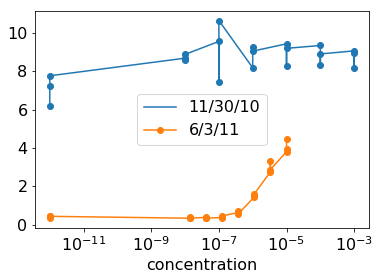

In [121]:
plt.rcParams['font.size'] = 16
x = dose_response.loc[(1274,1282)].set_index('concentration').sort_index()
ax = x[x['Date']==113010].plot(y='NormalizedLuc',marker='o',label='11/30/10')
x[x['Date']==60311].plot(y='NormalizedLuc',marker='o',label='6/3/11',ax=ax)
plt.xscale('log')

In [95]:
dose_response.loc[(1274,999)].sort_values('concentration').head(25)#.groupby(['concentration']).mean()['NormalizedLuc']


/Users/rgerkin/Dropbox/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


concentration  NormalizedLuc    Date
Odor OR                                       
1274 999   1.000000e-12       0.431998  113010
     999   1.000000e-12            NaN   60311
     999   1.000000e-12       0.220789   60311
     999   1.000000e-12       0.145924   60311
     999   1.000000e-12       0.441339  113010
     999   1.000000e-12            NaN   60311
     999   1.000000e-12       0.398924  113010
     999   1.000000e-12       0.205869   60311
     999   1.000000e-12            NaN   60311
     999   1.000000e-08       0.428325  113010
     999   1.000000e-08       0.427565  113010
     999   1.000000e-08       0.419150  113010
     999   1.371742e-08            NaN   60311
     999   1.371742e-08            NaN   60311
     999   1.371742e-08       0.177035   60311
     999   1.371742e-08       0.177040   60311
     999   1.371742e-08            NaN   60311
     999   1.371742e-08       0.165912   60311
     999   4.115226e-08            NaN   60311
     999   4.115226e-08       0.167217   60311
     999   4.115226e-08            NaN   60311
     999   4.115226e-08       0.130408   60311
     999   4.115226e-08            NaN   60311
     999   4.115226e-08       0.164568   60311
     999   1.000000e-07       0.487986  113010

In [48]:
joined = dose_response.join(odors).set_index('OR').join(receptors)
joined = joined.reset_index().set_index(['OdorName','OR'])[['concentration','NormalizedLuc','Date']]
del joined['Date']
joined

concentration  NormalizedLuc
OdorName                   OR                                
(+)-carvone                999    1.000000e-12       0.420023
                           999    1.000000e-08       0.310963
                           999    1.000000e-07       0.326847
                           999    1.000000e-06       0.243413
                           999    1.000000e-05       0.359301
                           999    1.000000e-04       0.276730
                           999    1.000000e-03            NaN
                           999    1.000000e-02            NaN
                           999    1.000000e-05       0.216453
                           999    1.000000e-12       0.284142
                           999    1.000000e-12       0.328941
                           999    1.000000e-08       0.358694
                           999    1.000000e-07       0.313155
                           999    1.000000e-06       0.209185
                           999    1.000000e-05       0.150108
                           999    1.000000e-04       0.174610
                           999    1.000000e-03       0.167321
                           999    1.000000e-02       0.567204
                           999    1.000000e-12       0.385778
                           999    1.000000e-08       0.385279
                           999    1.000000e-07       0.355726
                           999    1.000000e-06       0.223809
                           999    1.000000e-05       0.158967
                           999    1.000000e-04       0.137797
                           999    1.000000e-03       0.215134
                           999    1.000000e-02       0.613982
                           999    1.000000e-12       0.336449
                           999    1.000000e-08       0.344729
                           999    1.000000e-07       0.217053
                           999    1.000000e-06       0.196850
...                                        ...            ...
3-phenyl propyl propionate 1781   1.000000e-06      13.394794
                           1781   1.000000e-05      15.067140
                           1781   1.000000e-07      13.454060
                           1781   1.000000e-02            NaN
                           1781   1.000000e-03      14.380171
                           1781   1.000000e-04      14.412396
cis-3-hexen-1-ol           1784   1.000000e-12       0.575060
                           1784   1.000000e-02       1.785124
                           1784   1.000000e-03       1.681185
                           1784   1.000000e-02       1.513158
                           1784   1.000000e-06       0.852239
                           1784   1.000000e-03       1.496732
                           1784   1.000000e-07       0.791667
                           1784   1.000000e-02       1.975904
                           1784   1.000000e-05       1.167862
                           1784   1.000000e-08       0.610358
                           1784   1.000000e-03       1.390445
                           1784   1.000000e-04       1.247834
                           1784   1.000000e-12       0.518268
                           1784   1.000000e-04       1.624382
                           1784   1.000000e-05       1.078212
                           1784   1.000000e-08       0.659341
                           1784   1.000000e-07       0.704160
                           1784   1.000000e-06       0.728314
                           1784   1.000000e-12       0.596465
                           1784   1.000000e-04       1.108271
                           1784   1.000000e-06       0.913194
                           1784   1.000000e-05       0.910632
                           1784   1.000000e-07       0.677372
                           1784   1.000000e-08       0.579795

[22362 rows x 2 columns]

In [51]:
df = joined.groupby(['OdorName','OR','concentration']).mean().dropna()
df.head(30)

NormalizedLuc
OdorName    OR   concentration               
(+)-carvone 999  1.000000e-12        0.280447
                 1.000000e-08        0.255621
                 1.371742e-08        0.225753
                 1.371742e-08        0.233691
                 4.115226e-08        0.300748
                 4.115226e-08        0.218337
                 1.000000e-07        0.238344
                 1.234568e-07        0.221844
                 1.234568e-07        0.290324
                 3.703704e-07        0.214356
                 3.703704e-07        0.255444
                 1.000000e-06        0.172423
                 1.111111e-06        0.235441
                 1.111111e-06        0.221349
                 3.333333e-06        0.188627
                 3.333333e-06        0.218822
                 1.000000e-05        0.182900
                 1.000000e-04        0.158566
                 1.000000e-03        0.201294
                 1.000000e-02        0.477851
            1528 1.000000e-12        2.012425
                 1.000000e-08        3.294213
                 1.000000e-07        5.264023
                 1.000000e-06        7.525514
                 1.000000e-05        9.413434
                 1.000000e-04        7.659271
            1529 1.000000e-12        4.450075
                 1.000000e-08        6.335096
                 1.371742e-08        3.493483
                 4.115226e-08        4.390729

In [56]:
#Loop through each row, subtract vector controls
df_sub = df.copy()

for odor,OR,concentration in df.index:
    if True:#gene != "Vector control":
        try:
            df_sub.loc[(odor,OR,concentration),'NormalizedLuc'] -= df.loc[(odor,999,concentration),'NormalizedLuc']
        except:
            df_sub = df_sub.drop((odor,OR,concentration))

In [61]:
df_clean = df_sub[df_sub['NormalizedLuc'].notnull()]
df_clean = df_clean.drop(999,level=1)
df_clean = df_clean.rename(columns={'NormalizedLuc':'Experiment'})
df_clean.head(15)

Experiment
OdorName    OR   concentration            
(+)-carvone 1528 1.000000e-12     1.731978
                 1.000000e-08     3.038592
                 1.000000e-07     5.025679
                 1.000000e-06     7.353091
                 1.000000e-05     9.230534
                 1.000000e-04     7.500705
            1529 1.000000e-12     4.169628
                 1.000000e-08     6.079475
                 1.371742e-08     3.267730
                 4.115226e-08     4.089981
                 1.000000e-07     7.224162
                 1.234568e-07     5.643130
                 3.703704e-07     5.939403
                 1.000000e-06     8.054923
                 1.111111e-06     6.338688

In [62]:
df_max = df_clean.groupby(['OdorName','OR']).max()
df_max.head()

Experiment
OdorName    OR              
(+)-carvone 1528    9.230534
            1529    8.054923
            1530    7.326618
            1531    4.769214
            1727    0.416741

In [63]:
df_min = df_clean.groupby(['OdorName','OR']).min()
df_min.head()

Experiment
OdorName    OR              
(+)-carvone 1528    1.731978
            1529    2.159045
            1530    2.230213
            1531    1.487978
            1727   -0.041355

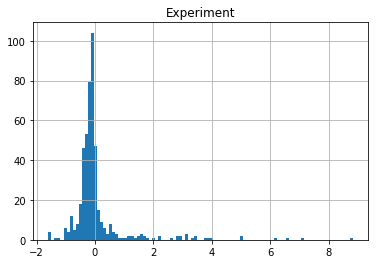

In [64]:
df_min.hist(bins=100);

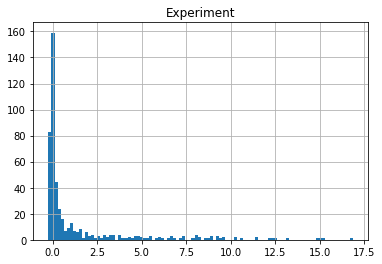

In [65]:
df_max.hist(bins=100);

In [70]:
example_data = df_clean.loc['(+)-carvone',1528]
example_data

,Experiment
concentration,
1.000000e-12,1.731978
1.000000e-08,3.038592
1.000000e-07,5.025679
1.000000e-06,7.353091
1.000000e-05,9.230534
1.000000e-04,7.500705


In [71]:
import numpy as np
from scipy.optimize import minimize

def f(parameters,data,ax=None):
    maxx, c0, n = parameters
    c = data.index.values
    prediction = (maxx-0)/(1+(c0/c)**n)
    actual = data['Experiment'].values
    error = np.mean((prediction-actual)**2)
    if ax:
        data.plot(marker='o',ax=ax)
        ax.set_xscale('log')
        x = np.logspace(-15,0,100)
        y = (maxx-0)/(1+(c0/x)**n)
        ax.plot(x,y,'r',label='Fit');
        ax.set_ylim(-2,18)
        ax.legend();
    return error

results = minimize(f,[5.0,1e-6,2],args=(example_data,),bounds=[(0,100),(1e-18,1e1),(0,20)])
maxx,c0,n = results.x
print("Max response = %.2g; 1/2 max concentration = %.2g; exponent = %.2g" % (maxx,c0,n))

Max response = 8; 1/2 max concentration = 2.4e-08; exponent = 0.61


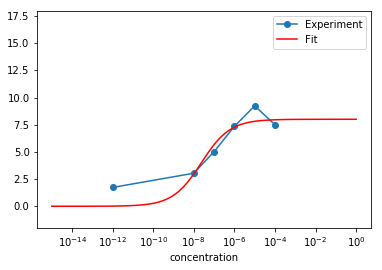

In [72]:
# Plot data and fit to see if they roughly agree
fig,ax = plt.subplots()
f([maxx,c0,n],example_data,ax=ax);

In [73]:
df_fit_params = df_max.copy()[[]]
df_fit_params['maxx'] = 0
df_fit_params['c0'] = 0
df_fit_params['n'] = 0
df_fit_params['error'] = 0
df_fit_params.head()

maxx  c0  n  error
OdorName    OR                      
(+)-carvone 1528     0   0  0      0
            1529     0   0  0      0
            1530     0   0  0      0
            1531     0   0  0      0
            1727     0   0  0      0

In [74]:
for i in df_fit_params.index:
    data = df_clean.loc[i]
    results = minimize(f,[5.0,1e-6,2],args=(data,),bounds=[(0,100),(1e-18,1e1),(0,20)])
    maxx,c0,n = results.x
    df_fit_params.loc[i,:] = maxx,c0,n,results.fun
    #print(i)
    #print("Max response = %.2g; 1/2 max concentration = %.2g; exponent = %.2g" % (maxx,c0,n))

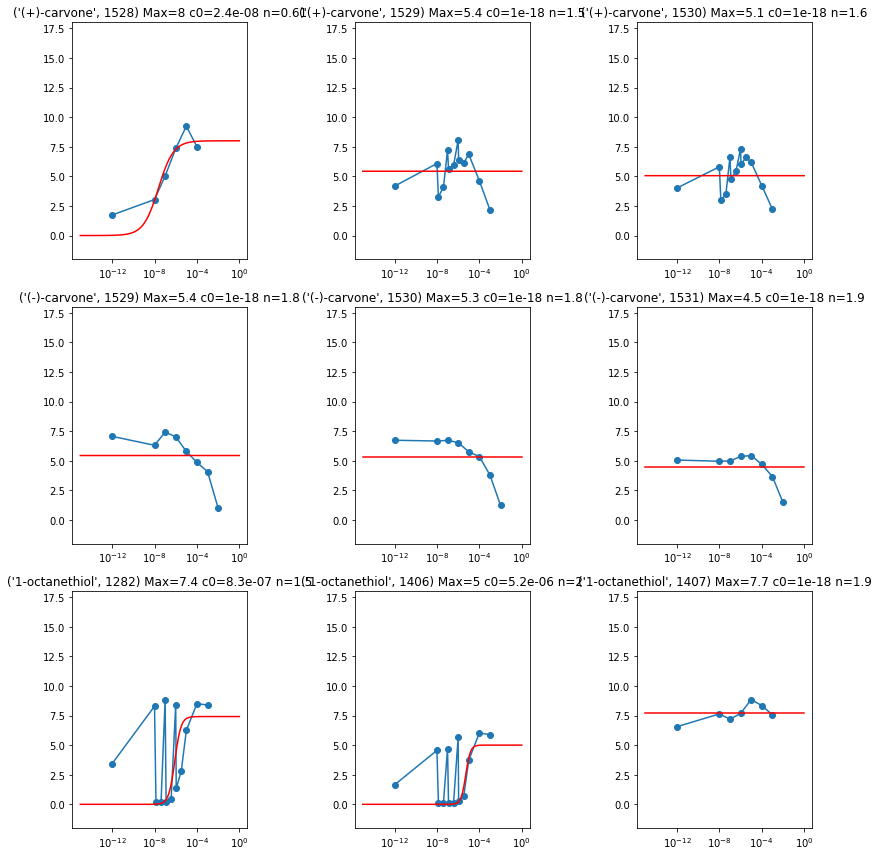

In [76]:
fig,axes = plt.subplots(3,3,figsize=(12,12))
odors = list(set(df_fit_params.index.get_level_values('OdorName')))
genes = list(set(df_fit_params.index.get_level_values('OR')))

i = 0
plots = 0
while plots<len(axes.flat):
    ax = axes.flat[plots]
    if df_max.iloc[i]['Experiment']>5:
        combo = df_max.index[i]
        maxx,c0,n,error = df_fit_params.loc[combo].values
        f([maxx,c0,n],df_clean.loc[combo],ax=ax)
        ax.legend_.remove()
        ax.set_title('%s Max=%.2g c0=%.2g n=%.2g' % (combo,maxx,c0,n))
        ax.set_xlabel('')
        plots += 1
    i += 1
plt.tight_layout()

In [77]:
df.loc[('1-octanethiol',1282)]

,NormalizedLuc
concentration,
1.000000e-12,3.737656
1.000000e-08,8.712467
1.371742e-08,0.346694
4.115226e-08,0.356499
1.000000e-07,9.208213
1.234568e-07,0.401221
3.703704e-07,0.634600
1.000000e-06,8.841156
1.111111e-06,1.507742


In [21]:
df.loc[('1-octanethiol','Vector control')]

,NormalizedLuc
concentration,
1.000000e-12,0.307474
1.000000e-08,0.425014
1.371742e-08,0.173329
4.115226e-08,0.154064
1.000000e-07,0.395182
1.234568e-07,0.175720
3.703704e-07,0.165766
1.000000e-06,0.420016
1.111111e-06,0.170440


In [86]:
df_fit_params.head(10)

maxx            c0  \
OdorName           Gene                                                   
(+)-carvone        OR1A1                        10.817769  1.000000e-18   
                   OR1A1 P285S                   4.023436  4.046501e-09   
                   OR1A1 R128H                   7.955430  2.234445e-08   
                   OR1A1 V233M                  10.055815  1.000000e-18   
                   OR8B3 H20R/Q24R/V34I/M114I    0.281454  2.946298e+00   
(+)-dihydrocarvone OR51F1                        4.487981  8.648700e-01   
                   OR51F1                        4.534501  7.910781e-01   
                   OR51F1 T13A                   4.473331  8.859770e-01   
(+)-menthol        OR2A12                        4.485698  8.664602e-01   
                   OR8K3 L122R                   4.999380  1.240874e-03   

                                                       n  
OdorName           Gene                                   
(+)-carvone        OR1A1                        0.000319  
                   OR1A1 P285S                  0.584613  
                   OR1A1 R128H                  0.612074  
                   OR1A1 V233M                  0.000517  
                   OR8B3 H20R/Q24R/V34I/M114I   0.028009  
(+)-dihydrocarvone OR51F1                       3.176968  
                   OR51F1                       2.983852  
                   OR51F1 T13A                  3.236464  
(+)-menthol        OR2A12                       3.183687  
                   OR8K3 L122R                  1.999874